# Height-Weight Prediction

### Load the libraries

In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math, copy

### Load the Dataset

In [329]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### What are the predictor and dependent variable values in our dataset?
<br>

<b> 1. Predictor variables (x) </b> - values which help us find our outcome, here the Height and Gender <br><br>
<b> 2. Dependent variable (y) </b> - values which should be the result of our prediction, here the Weight

In [330]:
x = data[['Height', 'Gender']]
y = data['Weight']
x.head()

,Height,Gender
0,73.847017,Male
1,68.781904,Male
2,74.110105,Male
3,71.730978,Male
4,69.881796,Male


### Understanding the relationship between predictor and dependent variables

Text(0.5, 1.0, 'Gender vs Weight')

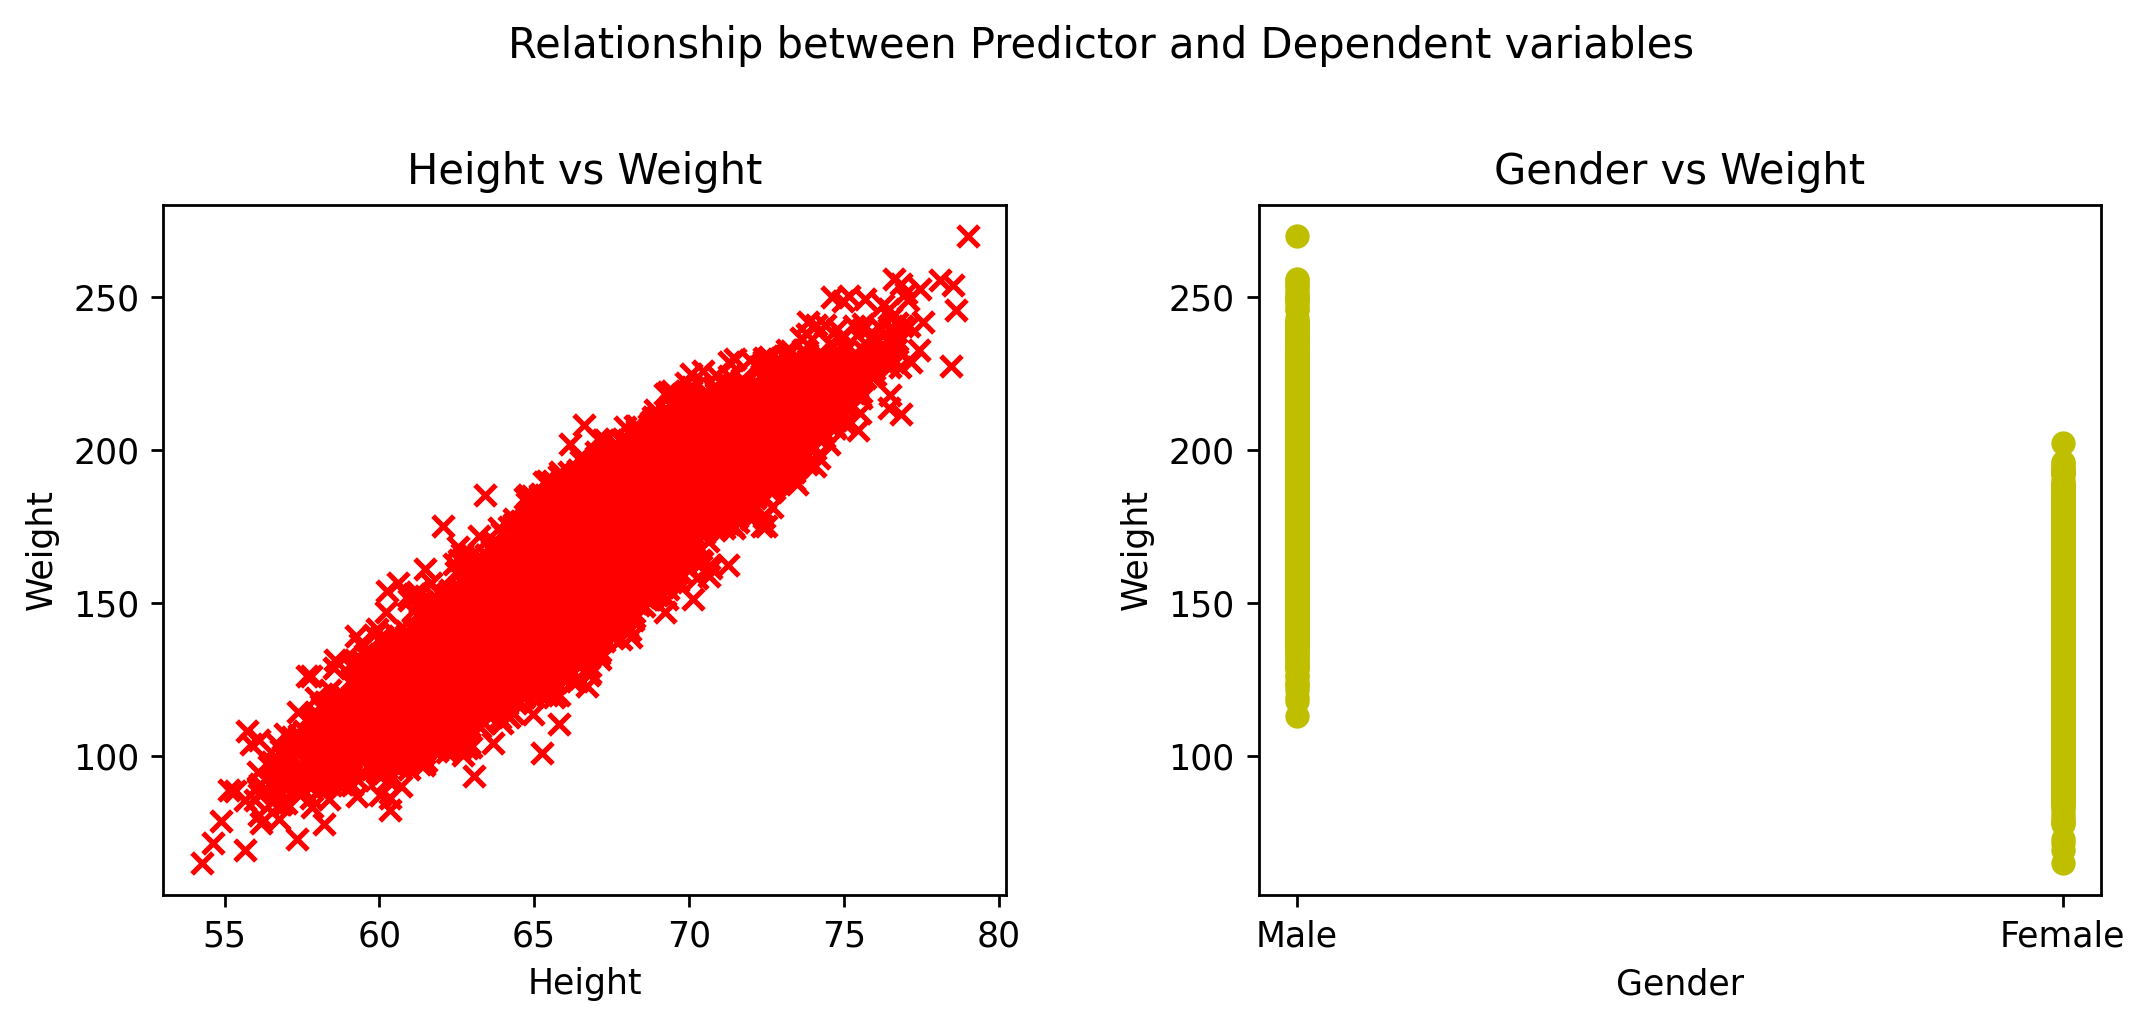

In [331]:
# making 2 subplots in same window (1 row, 2 columns)
figure, axis = plt.subplots(1, 2, figsize = (10, 4), dpi = 250, linewidth = 1.5)

# giving a title to the plots
figure.suptitle('Relationship between Predictor and Dependent variables')
plt.subplots_adjust(top = 0.8, wspace = 0.3)


# Height vs Weight plot
axis[0].scatter(x.iloc[:, 0], y, color = 'red', marker = 'x')
axis[0].set_xlabel('Height')
axis[0].set_ylabel('Weight')
axis[0].set_title('Height vs Weight')

# Gender vs Weight plot
axis[1].scatter(x.iloc[:, 1], y, color = 'y')
axis[1].set_xlabel('Gender')
axis[1].set_ylabel('Weight')
axis[1].set_title('Gender vs Weight')

### Separating Dataset into Training set and Testing set

**Note:** *For feature values, we will only take height for simplicity*

In [332]:
train_size = int(0.8 * len(x))

# Training set
x_train = np.array(x['Height'][:train_size])
y_train = np.array(y[:train_size])

# Testing set
x_test = np.array(x['Height'][train_size:])
y_test = np.array(y[train_size:])

### Define the cost function
*We are using the **mean squared error** cost function*

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

where, $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

In [333]:
'''
Cost Function J(w, b)

Arguments:

    m = number of training examples
    x = features
    y = targets
    w, b = parameters or weights
    
Output:
    
    total_cost = the cost (or error) of using w, b as parameters for linear regression
'''

def cost_function_J (x, y, w, b):
    
    # finding number of training examples
    m = x.shape[0]
    
    cost_sum = 0
    
    for i in range(m):
        f = w * x[i] + b
        cost = (f - y[i]) ** 2
        cost_sum += cost
    
    total_cost = (1 / (2 * m)) * cost_sum
    
    return total_cost

### Implementing Gradient Descent

$$\begin{align*} \text{repeat}&\text{ until minimum cost:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

<br>

where, gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \\
\end{align}
$$

In [334]:
'''
Find Gradient dJ(w, b)/dw & dJ(w, b)/db

Arguments:
    
    m = number of training examples
    x = features
    y = targets
    w, b = parameters, weights
    
Outputs:

    dj_dw = derivative of cost function with respect to parameter w
    dj_db = derivative of cost function with respect to parameter b
'''


def find_gradient (x, y, w, b):
    # finding number of training examples
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f = w * x[i] + b
        
        # finding gradient of each element
        dj_dw_i = (f - y[i]) * x[i]
        dj_db_i = (f - y[i])
        
        # finding summation
        dj_dw += dj_dw_i
        dj_db += dj_db_i
        
    # find average
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

#### Define Gradient Descent

In [335]:
'''
Gradient Descent - updates the values of w & b so that accurate value of 
                   weight can be predicted using f(w, b) = w * x + b
                   
Arguments:

    x = features
    y = targets
    w, b = parameters or weights
    alpha = learning rate
    epochs = number of iterations
    
    cost_function_J = the cost function for our algorithm
    find_gradient = function that computes the gradient values dJ/dw & dJ/db
    
Outputs:

    w = updated value of parameter w
    b = updated value of parameter b
    J_history = history of values of cost function J
    p_history = history of values of parameters w & b
'''

def gradient_descent (x, y, w, b, alpha, epochs, cost_function, gradient_function):
    
    # a list to store J and w, b values for use later
    J_history = []
    p_history = []
    
    # making copy of w, b so that global variables are not changed
    temp_w = w
    temp_b = b
    
    for i in range(epochs):
        
        # calculate gradient
        dj_dw, dj_db = gradient_function(x, y, temp_w, temp_b)
        
        # update the parameters
        temp_w = temp_w - alpha * dj_dw
        temp_b = temp_b - alpha * dj_db
        
        # store values of J and w, b
        J_history.append(cost_function(x, y, temp_w, temp_b))
        p_history.append([temp_w, temp_b])
            
    # return updated values of w & b and the computed values of J and parameters 
    return temp_w, temp_b, J_history, p_history

### Train the algorithm

In [336]:
# giving some initial values of parameters or weights
initial_w = 0
initial_b = 0

# define the learning rate and epochs
alpha = 1.0e-05
epochs = 1000

# apply gradient descent
w_final, b_final, J_history, p_history = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                         alpha, epochs, cost_function_J, find_gradient)

# print the final values of the parameters
print("Regression Parameters after Training\n")
print(f"w ={w_final: 4.4f}")
print(f"b ={b_final: 4.4f}")

Regression Parameters after Training

w = 2.5186
b = 0.0263


### Predicted values of target from test dataset

In [337]:
y_predicted = []

num_test = len(x_test)

for i in range(num_test):
    y_hat = w_final * x_test[i] + b_final
    y_predicted.append(y_hat)

### Plot values of features and predicted targets of test dataset

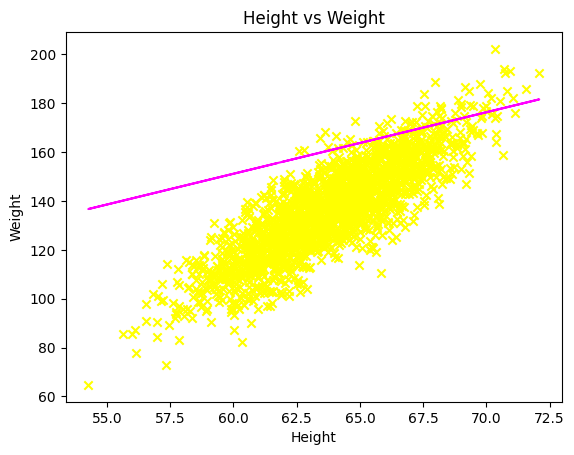

In [338]:
plt.scatter(x_test, y_test, color = 'yellow', marker = 'x')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')

# plot the Linear Regression line
plt.plot(x_test, y_predicted, color = 'magenta')

## Using scikit learn to implement Linear Regression

In [339]:
from sklearn.linear_model import LinearRegression

# make a linear regression model
model = LinearRegression()

# train the model with training dataset
model.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

# use model to find predicted target values
y_prediction = model.predict(x_test.reshape(-1, 1))

#### Predicted values using sklearn library

In [340]:
print("Predicted values ", np.round(y_prediction[:5, 0], 2)) 
print("Real values      ", np.round(y_test[:5], 2))

Predicted values  [127.14 122.03 113.11  84.26 106.11]
Real values       [118.51 122.56 106.78  87.3  110.82]


#### Plotting the features and predicted target values

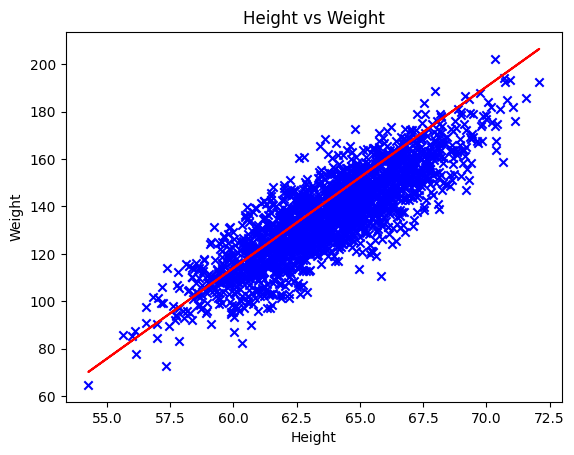

In [341]:
plt.scatter(x_test, y_test, color = 'blue', marker = 'x')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')

# plot the Linear Regression line
plt.plot(x_test, y_prediction, color = 'red' )
      
plt.show()

## Comparison between our predicted value and sklearn library values

In [342]:
# our values
print("Our Results\n")
print("Predicted values =", np.round(y_predicted[:5], 2))
print("Actual values    =", np.round(y_test[:5], 2))

print("\n")

# sklearn values
print("Sklearn Results\n")
print("Predicted values =", np.round(y_prediction[:5, 0], 2))
print("Actual values    =", np.round(y_test[:5], 2))

Our Results

Predicted values = [155.46 153.77 150.84 141.33 148.53]
Actual values    = [118.51 122.56 106.78  87.3  110.82]


Sklearn Results

Predicted values = [127.14 122.03 113.11  84.26 106.11]
Actual values    = [118.51 122.56 106.78  87.3  110.82]


<br>

# House Price Prediction using sklearn

#### Load the dataset

In [343]:
dataset = pd.read_csv('housePrice.csv')

# explore the dataset
dataset.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


#### Separate features and labels

In [344]:
x = dataset['LotArea']
y = dataset['SalePrice']

#### Segregate the dataset

In [345]:
train_size = int(0.8 * len(x))

# Training set
x_train = np.array(x[:train_size])
y_train = np.array(y[:train_size])

# Testing set
x_test = np.array(x[train_size:])
y_test = np.array(y[train_size:])

#### Make a plot to understand the dataset better

Text(0.5, 1.0, 'Lot Area vs Sale Price')

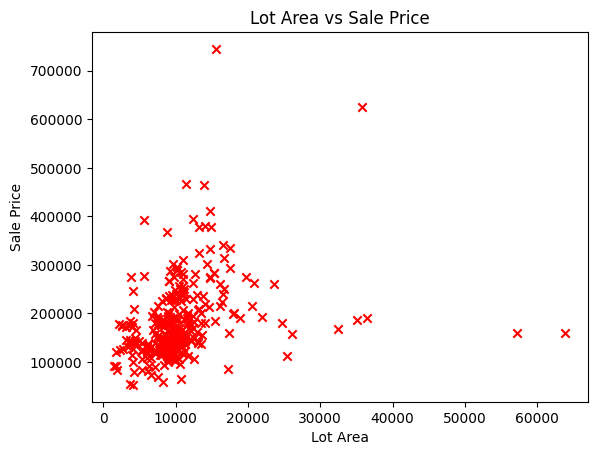

In [346]:
plt.scatter(x_test, y_test, color = 'red', marker = 'x')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Lot Area vs Sale Price')

### Use sklearn to predict the values

In [347]:
# make a linear regression model
model = LinearRegression()

# train the model with training dataset
model.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

# use model to find predicted target values
y_prediction = model.predict(x_test.reshape(-1, 1))

#### Predicted values using learn of House Prices

In [348]:
print("Predicted values ", np.rint(y_prediction[:5, 0])) 
print("Real values      ", (y_test[:5]))

Predicted values  [186860. 229943. 179336. 177850. 167871.]
Real values       [235000 625000 171000 163000 171900]


#### Analyzing the predicted values

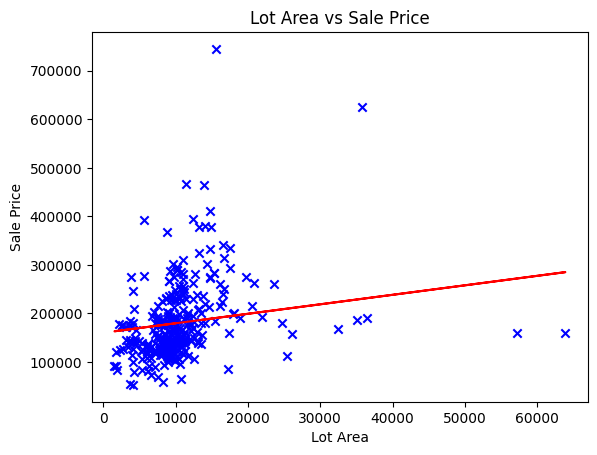

In [349]:
plt.scatter(x_test, y_test, color = 'blue', marker = 'x')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Lot Area vs Sale Price')

# plot the Linear Regression line
plt.plot(x_test, y_prediction, color = 'red' )
      
plt.show()